# NETFLIX MOVIES AND TV SHOWS CLUSTERING

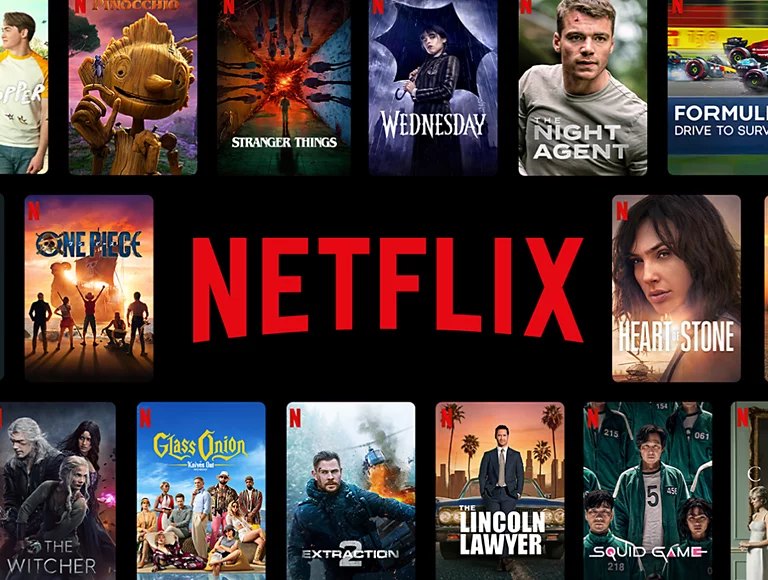

## Problem Statement


Develop a system to analyze and cluster Netflix movies and TV shows based on their features to gain insights

## Business Context

Netflix is a leading streaming service with a vast library of movies and TV shows. To provide personalized recommendations and improve user engagement, Netflix needs to understand the different types of content that its users enjoy. By clustering movies and TV shows based on their features, Netflix can gain valuable insights into user preferences and make more accurate recommendations.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sc
from sklearn.cluster import KMeans
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import download
from nltk.util import ngrams

In [41]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Read the CSV file from Google Drive
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [43]:
# Get information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [44]:
# Get the column names
a = df.columns

# Calculate the percentage of missing values for each column
b = []
for i in range(len(a)):
  b.append(df[a[i]].isnull().sum() / 7787 * 100)

# Create a DataFrame with column names and percentage of missing values
c = pd.DataFrame({'columns': a, 'null%': b})
c

,columns,null%
0,show_id,0.000000
1,type,0.000000
2,title,0.000000
3,director,30.679337
4,cast,9.220496
5,country,6.510851
6,date_added,0.128419
7,release_year,0.000000
8,rating,0.089893
9,duration,0.000000


In [45]:
df = df.dropna(subset=['director', 'cast', 'country'])

# Get the column names
a = df.columns

# Calculate the percentage of missing values for each column
b = []
for i in range(len(a)):
  b.append(df[a[i]].isnull().sum() / 7787 * 100)

# Create a DataFrame with column names and percentage of missing values
c = pd.DataFrame({'columns': a, 'null%': b})
c

,columns,null%
0,show_id,0.000000
1,type,0.000000
2,title,0.000000
3,director,0.000000
4,cast,0.000000
5,country,0.000000
6,date_added,0.000000
7,release_year,0.000000
8,rating,0.051368
9,duration,0.000000


In [46]:
# Get the mode of the rating column
mode_rating = df['rating'].mode()[0]

# Fill missing values in the rating column with the mode
df['rating'].fillna(mode_rating, inplace=True)

# Get the column names
a = df.columns

# Calculate the percentage of missing values for each column
b = []
for i in range(len(a)):
  b.append(df[a[i]].isnull().sum() / 7787 * 100)

# Create a DataFrame with column names and percentage of missing values
c = pd.DataFrame({'columns': a, 'null%': b})
c

<ipython-input-46-57a18f5102bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'].fillna(mode_rating, inplace=True)


,columns,null%
0,show_id,0.0
1,type,0.0
2,title,0.0
3,director,0.0
4,cast,0.0
5,country,0.0
6,date_added,0.0
7,release_year,0.0
8,rating,0.0
9,duration,0.0


In [47]:
# Convert the date_added column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract the year and create a new column "year_added"
df['year_added'] = df['date_added'].dt.year

# Extract the month and create a new column "month_added"
df['month_added'] = df['date_added'].dt.month

# Drop the date_added column
df.drop(columns=['date_added'], inplace=True)
df

<ipython-input-47-ed2083925faf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added'] = pd.to_datetime(df['date_added'])
<ipython-input-47-ed2083925faf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_added'] = df['date_added'].dt.year
<ipython-input-47-ed2083925faf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018,7
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10


In [48]:
# Define numerical and textual columns
numerical_columns = ['release_year', 'month_added','year_added']
textual_columns = ['director', 'cast', 'country', 'description', 'duration', 'title', 'rating', 'duration', 'listed_in', 'description']

# Create a copy of the DataFrame
df2 = df.copy()

# Apply StandardScaler to numerical columns
df2[numerical_columns] = StandardScaler().fit_transform(df2[numerical_columns])


In [49]:
# Apply TF-IDF vectorization to textual columns
textual_features = TfidfVectorizer(max_features=1000).fit_transform(df2[textual_columns].apply(lambda x: ' '.join(x), axis=1))

# Concatenate the transformed features
df1 = pd.concat([df2[numerical_columns].reset_index(drop=True), pd.DataFrame(textual_features.toarray())], axis=1)
df1

,release_year,month_added,year_added,0,1,2,3,4,5,6,...,990,991,992,993,994,995,996,997,998,999
0,0.345534,1.459954,-1.818196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.179842,1.459954,-0.371456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.389993,1.183346,-1.094826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.232212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.495068,-1.582738,1.075284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.345534,0.076912,-1.094826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,-0.389993,1.183346,0.351914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.206305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4808,0.555685,0.076912,-0.371456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4809,-0.705218,-1.582738,1.075284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4810,-0.810294,0.906737,1.075284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Set X and y variables
X = df1
y = df1[0]

# Convert column names to string type
X.columns = X.columns.astype(str)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_scaled_1 = pca.fit_transform(X)

In [51]:
# Print the shape of the transformed data
print(pca_scaled_1.shape)


(4812, 2)


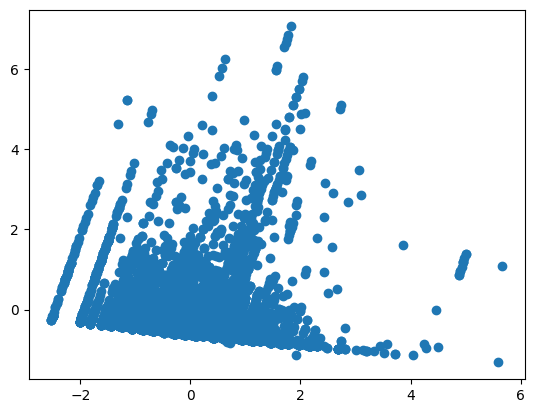

In [52]:
# Plot the scatter plot of the transformed data
plt.scatter(pca_scaled_1[:, 0], pca_scaled_1[:, 1])

# Hierarchical Clustering

Text(0, 0.5, 'Eucledian Distance')

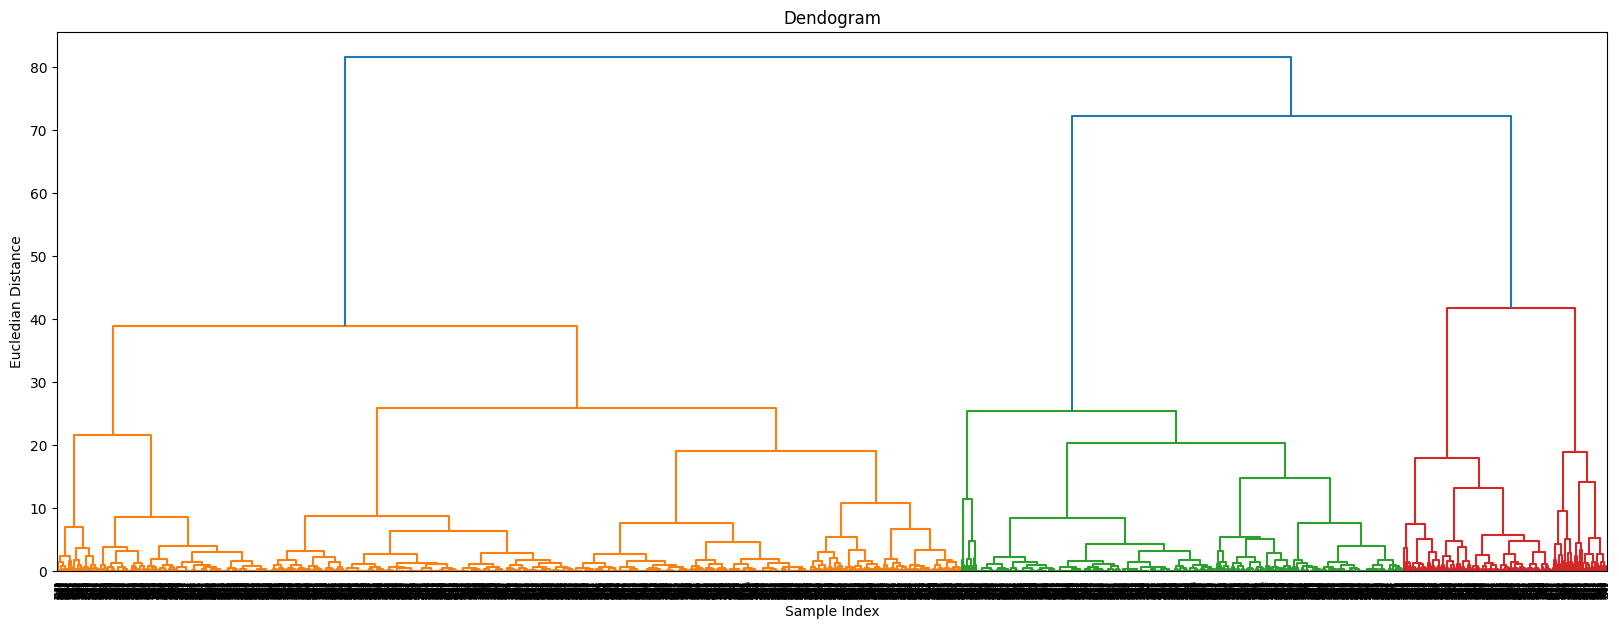

In [53]:
# Plot the dendrogram
plt.figure(figsize=(20, 7))
plt.title("Dendogram")
sc.dendrogram(sc.linkage(pca_scaled_1, method='ward'))
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [54]:
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled_1)
cluster.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, ..., 1, 0, 1])

Text(0.5, 1.0, 'Hierarchical Clustering')

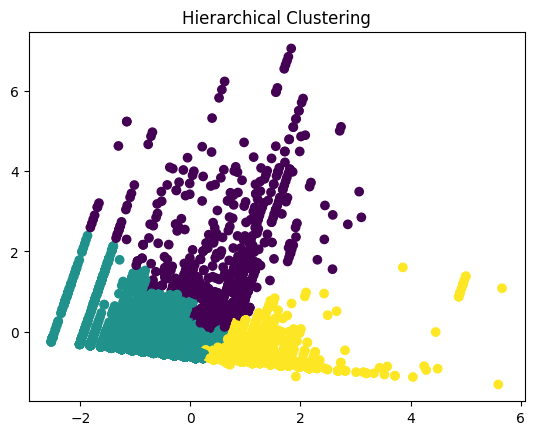

In [55]:

plt.scatter(pca_scaled_1[:, 0], pca_scaled_1[:, 1], c=cluster.labels_)
plt.title('Hierarchical Clustering')

# K-Means

In [56]:
# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(pca_scaled_1)
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [57]:
wcss

[10340.42104856607,
 6750.1143359728585,
 3883.7023438599163,
 3028.9666407433515,
 2427.8600508307545,
 2019.6311251804154,
 1694.6613175616194,
 1500.6175584096195,
 1344.6457148559434,
 1189.9421312297036]

([<matplotlib.axis.XTick at 0x7991eee3f5b0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

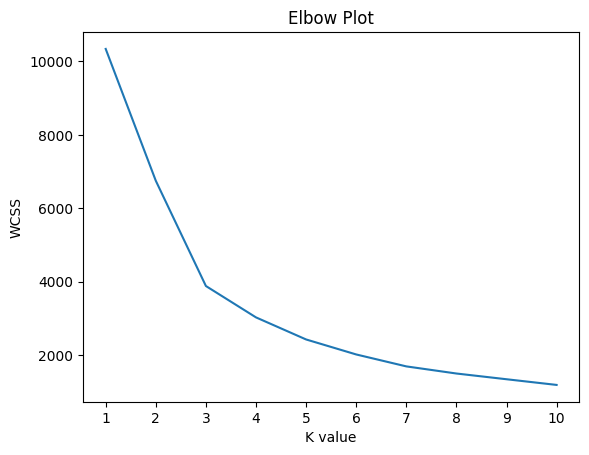

In [58]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Plot')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.xticks(range(1,11))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Kmeans Clusterring')

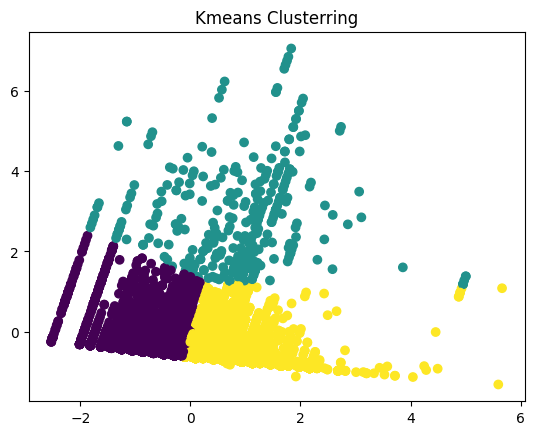

In [59]:
# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++')
y_labels = kmeans.fit_predict(pca_scaled_1)

# Plot the clusters
plt.scatter(pca_scaled_1[:, 0], pca_scaled_1[:, 1], c=y_labels)
plt.title('Kmeans Clusterring')


In [60]:
# Add the cluster labels to the DataFrame
df['Labels'] = list(y_labels)
df

<ipython-input-60-72fda8891eb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Labels'] = list(y_labels)


,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,Labels
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,2
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,2
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,2
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,2
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018,7,2
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,0
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10,0


In [61]:
df0 = df[df['Labels'] == 0]
df1 = df[df['Labels'] == 1]
df2 = df[df['Labels'] == 2]

In [62]:
print(df0.shape, df1.shape, df2.shape)


(2304, 14) (343, 14) (2165, 14)


In [63]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
# Define a function to get the frequency of genres
def genere_freq(df):
  categories = ' '.join(df['listed_in'].dropna()).lower()  # Combine all categories into a single string
  category_tokens = word_tokenize(categories)
  filtered_categories = [word for word in category_tokens if word.isalnum() and word != 'movies']

  # Count the frequency of each category
  category_freq = Counter(filtered_categories)
  top_n = 10

  # Get the top N most common categories and their frequencies
  top_categories = [category for category, freq in category_freq.most_common(top_n)]
  top_category_freqs = [freq for category, freq in category_freq.most_common(top_n)]

  # Plot the top N most common categories
  plt.figure(figsize=(10, 6))
  plt.barh(top_categories, top_category_freqs, color='skyblue')
  plt.xlabel('Frequency')
  plt.ylabel('Category')
  plt.title('Top {} Most Common Categories in Netflix Listings'.format(top_n))
  plt.gca().invert_yaxis()  # Invert y-axis to have the most common category on top
  plt.show()

<Axes: >

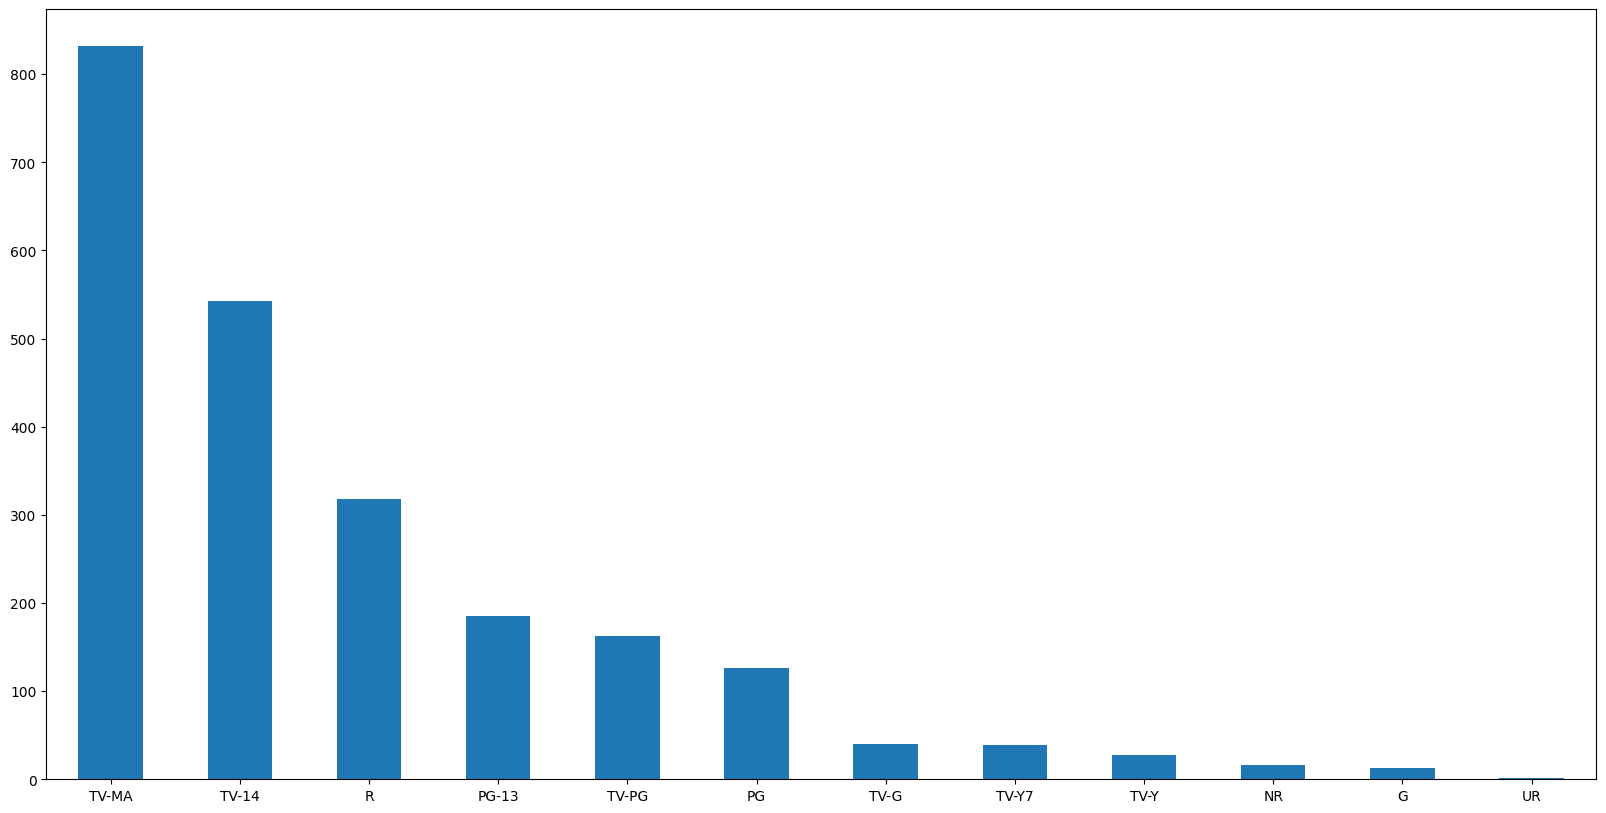

In [65]:
df0.rating.value_counts().plot(kind='bar', figsize=(20, 10), rot=0)

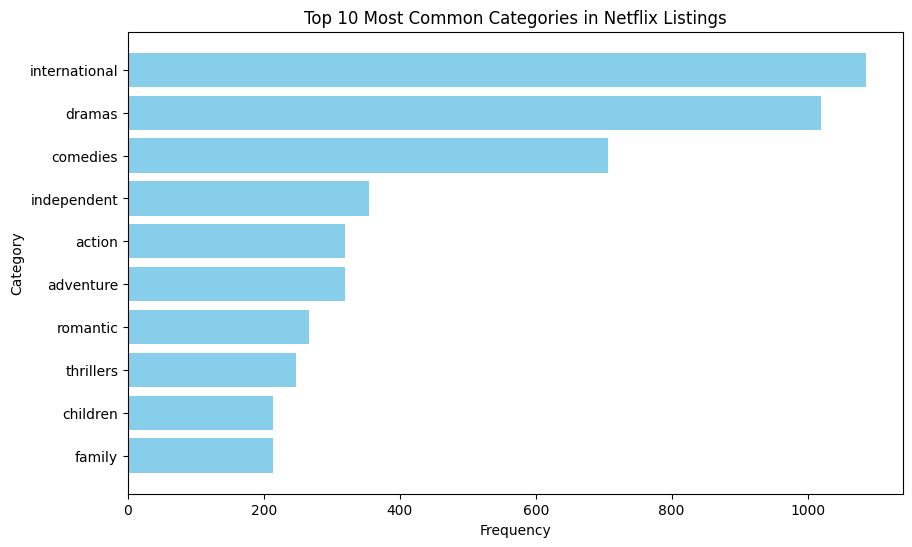

In [66]:
genere_freq(df0)

<Axes: >

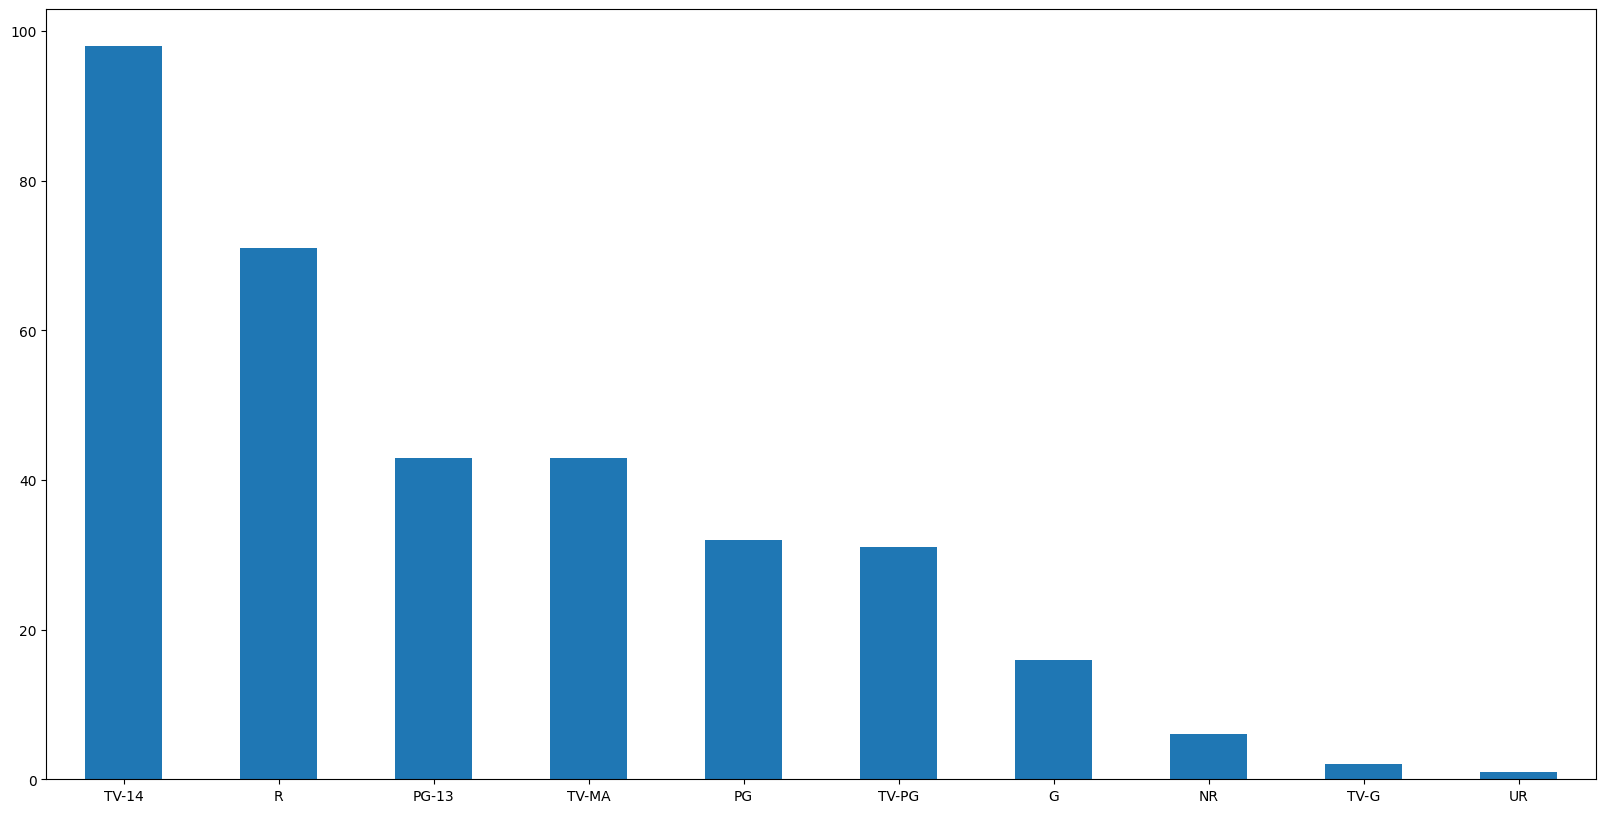

In [67]:
df1.rating.value_counts().plot(kind='bar', figsize=(20, 10), rot=0)

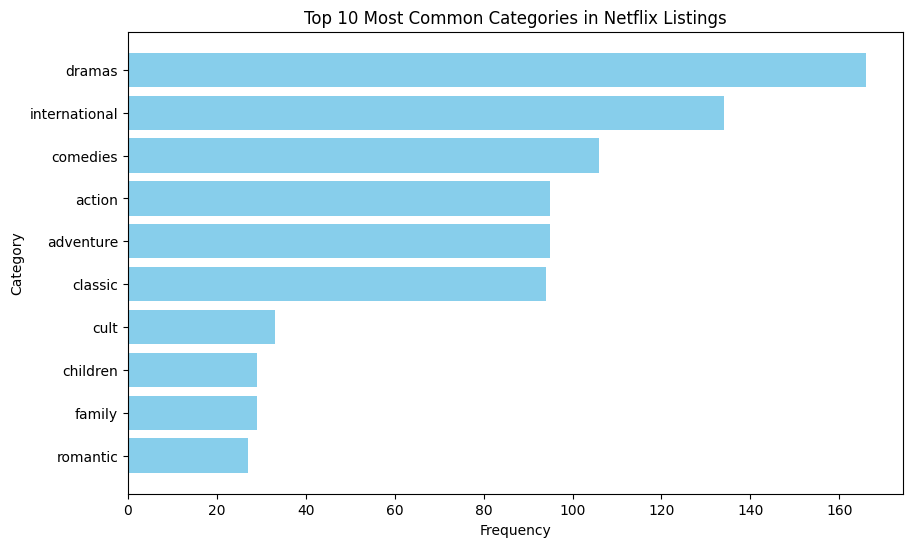

In [68]:
genere_freq(df1)

<Axes: >

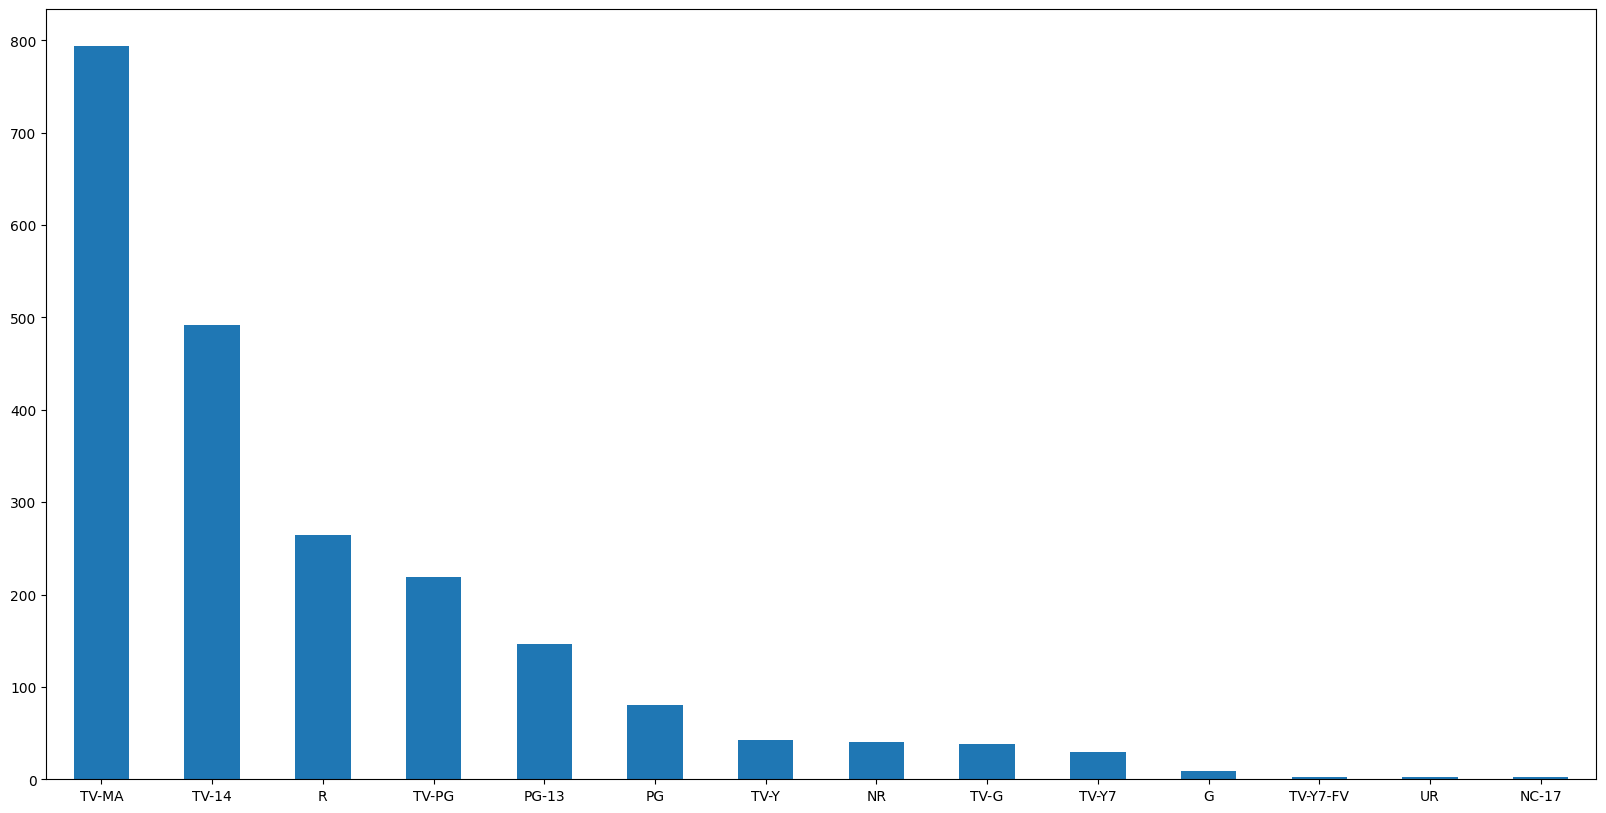

In [69]:
df2.rating.value_counts().plot(kind='bar', figsize=(20, 10), rot=0)

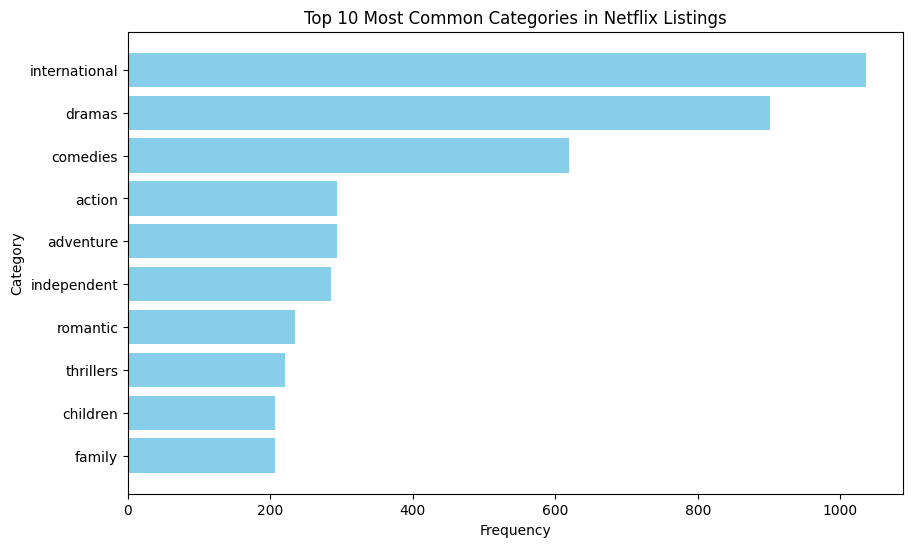

In [70]:
genere_freq(df2)


<Axes: title={'center': 'No of Movies and TV Shows produced Worldwide'}>

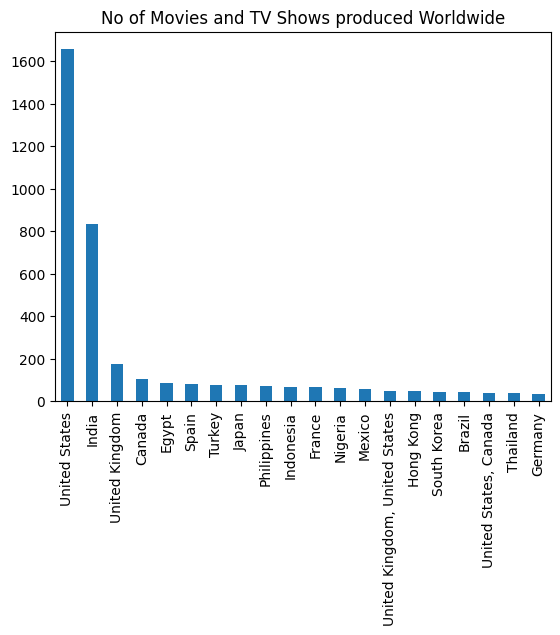

In [71]:
df.country.value_counts().head(20).plot(kind='bar',title="No of Movies and TV Shows produced Worldwide")

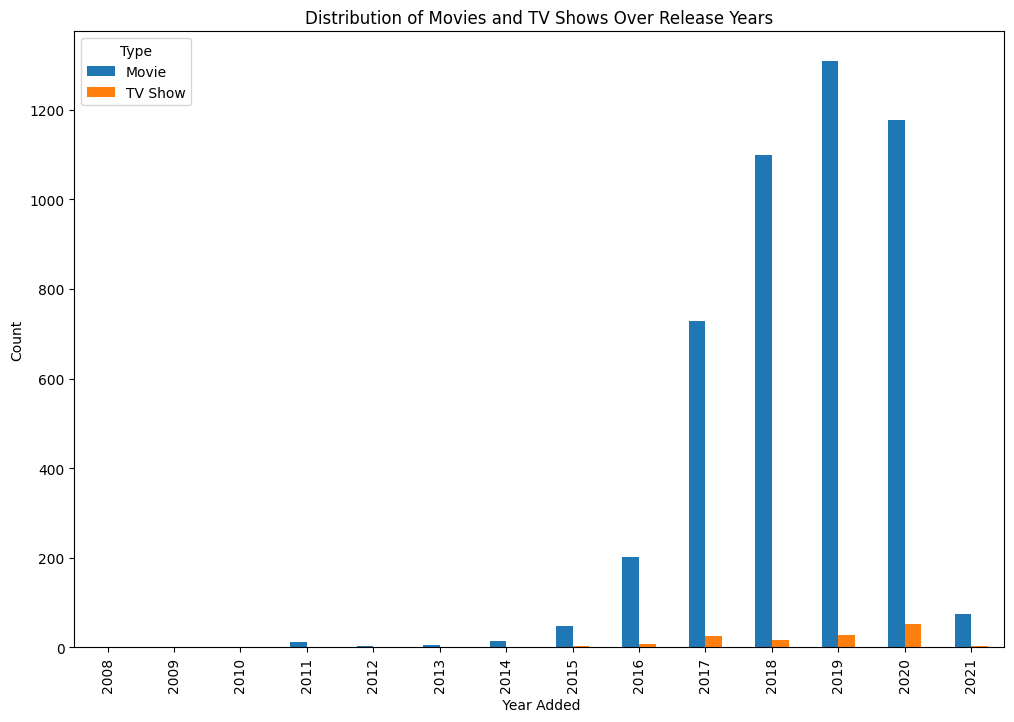

In [72]:
type_counts_by_year = df.pivot_table(index='year_added', columns='type', aggfunc='size', fill_value=0)

# Plot side-by-side bars
type_counts_by_year.plot(kind='bar', stacked=False, figsize=(12, 8))

# Set labels and title
plt.xlabel(' Year Added')
plt.ylabel('Count')
plt.title('Distribution of Movies and TV Shows Over Release Years')
plt.legend(title='Type', loc='upper left')
plt.show()

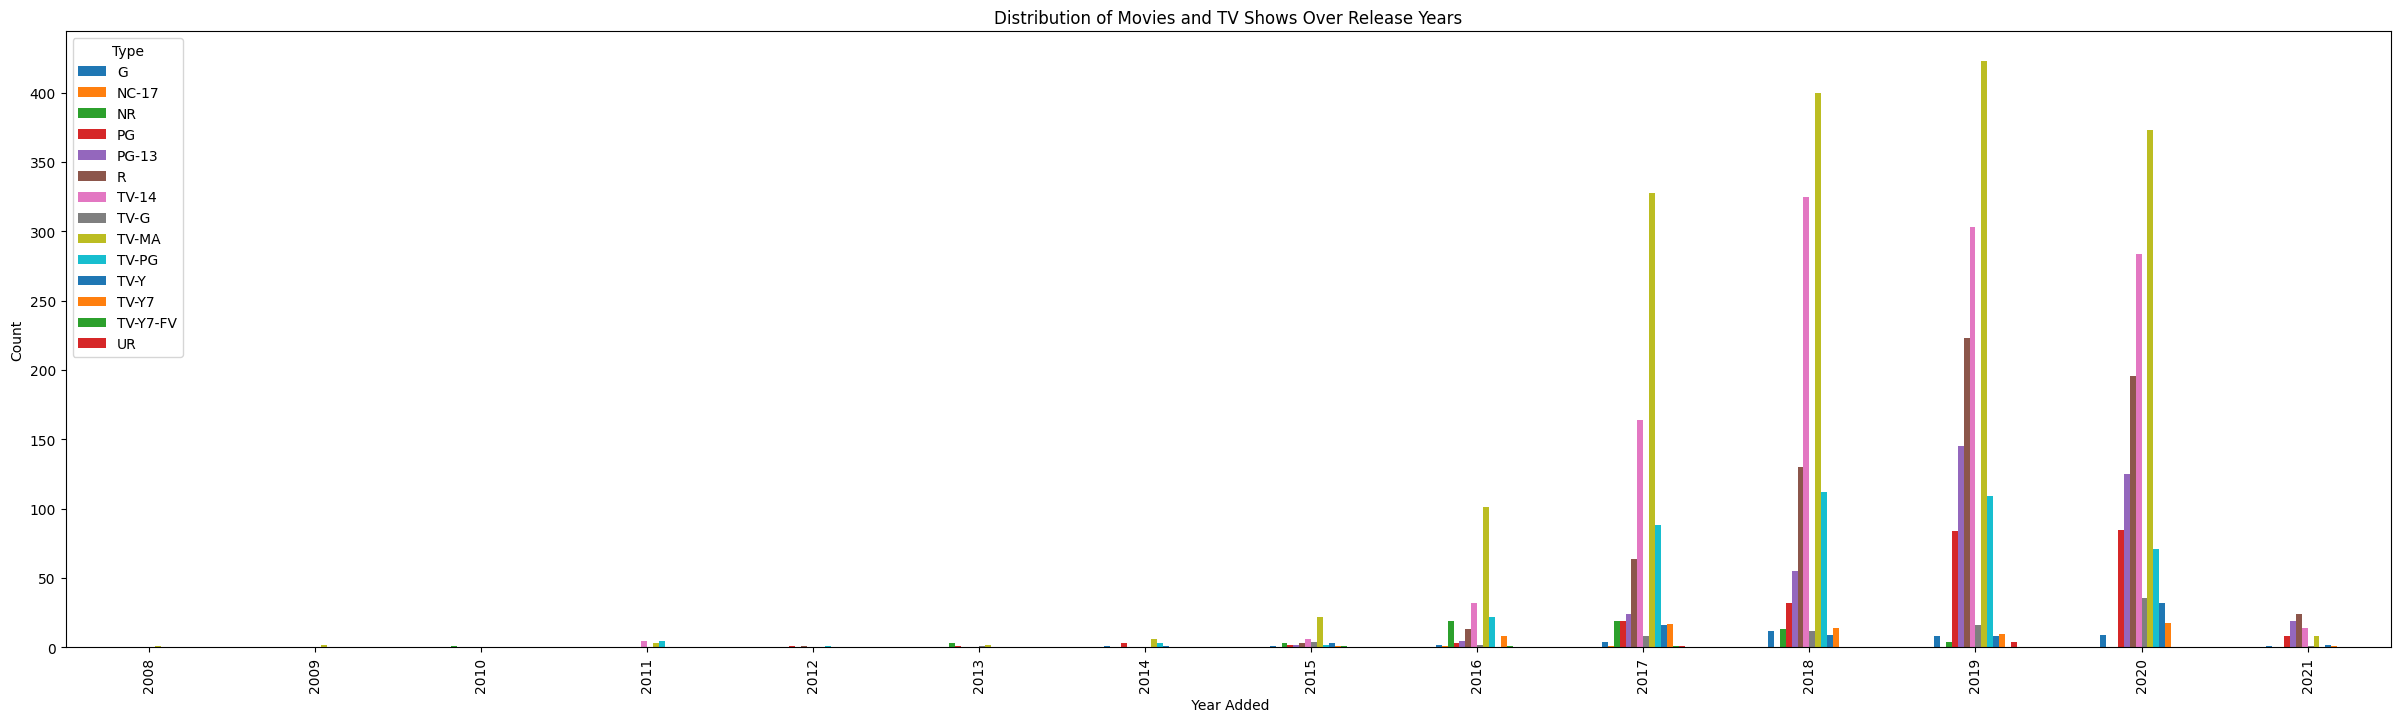

In [73]:
type_counts_by_year = df.pivot_table(index='year_added', columns='rating', aggfunc='size', fill_value=0)

# Plot side-by-side bars
type_counts_by_year.plot(kind='bar', stacked=False, figsize=(30, 8))

# Set labels and title
plt.xlabel(' Year Added')
plt.ylabel('Count')
plt.title('Distribution of Movies and TV Shows Over Release Years')
plt.legend(title='Type', loc='upper left')
plt.show()

## Insights and Conclusions



-  There are three distinct clusters of Netflix movies and TV shows based on their features.
- Cluster 0 has the highest number of movies and TV shows, followed by cluster 2 and then cluster 1.
- The distribution of movies and TV shows over release years is relatively consistent, with a slight increase in the number of TV shows in recent years.
- The distribution of ratings over release years shows that the majority of movies and TV shows are rated "TV-MA" or "TV-14".




## Application of project in the industry

The clustering results can be used to create personalized recommendations for Netflix users. By analyzing the features of movies and TV shows that a user has watched, Netflix can recommend similar content that the user is likely to enjoy.